# Indonesia Credit Data Analysis

  Pada project kali ini, kita akan melakukan customer segmentation dengan menggunakan 2 model yaitu Kmeans model dan Agglomerative model. Sebelum melakukan modelling dilakukan preprocessing data terlebih dahulu yaitu dengan menghandle outlier, missing values, melakukan scaling dan PCA. Hasil clustering customer segmentation dapat dilihat pada visualisasi data. Hasil cluster yang didapatkan dari model ini yaitu 2 cluster.

#Introduction

- Name : Efitri Apriliyan Senitawati
- Hacktiv8 Full Time Data Science Batch 015 - RMT
- Objective : Credit Data Customer Segmentation.



A Bachelor of Physics with a passion in analyzing data and enjoy reading a good book. Starting my career in banking with 5 years of professional experience then landed on the data science bootcamp and got a lot of new skills that matches my basic undergraduate knowledge. 
My specialties include making model predictions, python programming, data visualization, SQL, quickly learning new skills, problem solving and and have a good analytical thinking.

# Working Area

## Import Library

In [ ]:
#Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.datasets import make_moons
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
import warnings

import joblib
import json
warnings.simplefilter("ignore")

In [ ]:
# Library for Outlier
!pip install feature-engine

from feature_engine.outliers import Winsorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 4.3 MB/s 


## Data Loading

In [ ]:
# Loading data
df = pd.read_excel('IndonesiaCreditData.xlsx',sheet_name='Dataset')
df

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,2,49,male,1,own,little,NaN,25988304,12,education
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,4,53,male,2,free,little,little,60383130,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,996,40,male,3,own,little,little,47822943,30,car
997,997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,998,23,male,2,free,little,little,22876155,45,radio/TV


In [ ]:
#show data head
df.head()

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,2,49,male,1,own,little,NaN,25988304,12,education
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,4,53,male,2,free,little,little,60383130,24,car


In [ ]:
#Show data tail
df.tail()

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,996,40,male,3,own,little,little,47822943,30,car
997,997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,998,23,male,2,free,little,little,22876155,45,radio/TV
999,999,27,male,2,own,moderate,moderate,56737824,45,car


In [ ]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   No                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


## Exploratory Data Analysis

In [ ]:
df_num = df[['Age', 'Credit amount', 'Duration']]

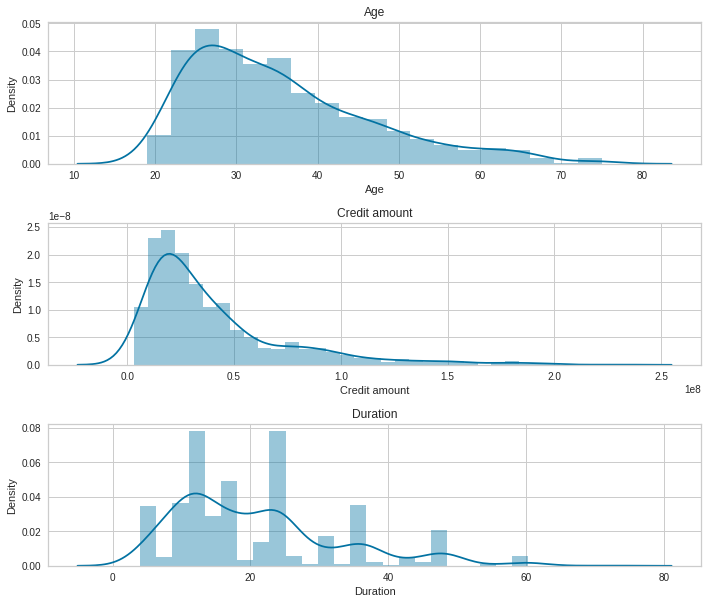

In [ ]:
# histplot of columns 

plt.figure(figsize=(10,50))
for i in range(len(df_num.columns)):
  plt.subplot(18, 1, i + 1)
  sns.distplot(df_num[df_num.columns[i]], kde = True)
  plt.title(df_num.columns[i])
plt.tight_layout();

Semua kolom pada variabel 'Age', 'Credit amount' dan 'Duration' terdistribusi tidak normal.

In [ ]:
#Menampilkan jenis klasifikasi diagnosa Sex
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
# Melihat jumlah pasien pada masing-masing klasifikasi diagnosa Sex
df['Sex'].value_counts()

male      690
female    310
Name: Sex, dtype: int64

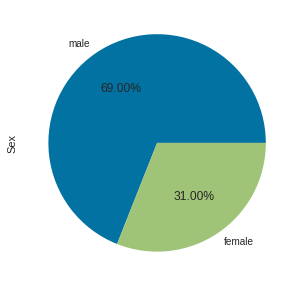

In [ ]:
#plot diagnosa stroke menggunakan pie chart untuk melihat perbandingan dalam persen.
df['Sex'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

Terdapat 69% customers atau sebanyak 690 orang adalah laki-laki dan sebesar 31% atau 310 customers berjenis kelamin perempuan.

In [ ]:
#Menampilkan jenis klasifikasi diagnosa Housing
df['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

In [ ]:
# Melihat jumlah pasien pada masing-masing klasifikasi diagnosa Sex
df['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

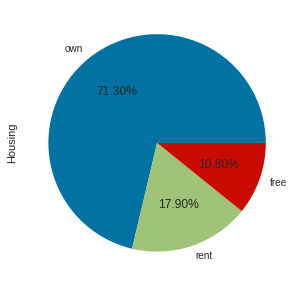

In [ ]:
#plot diagnosa stroke menggunakan pie chart untuk melihat perbandingan dalam persen.
df['Housing'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

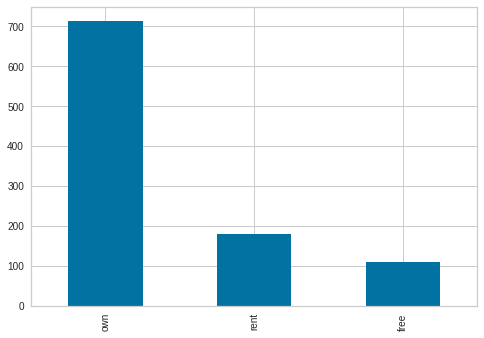

In [ ]:
# plot bar tipe daerah tempat tinggal pasien
df['Housing'].value_counts().plot(kind='bar')

Sebesar 71.30% / 713 customers memiliki tempat tinggal pribadi, sebesar 17.90% / 179 customers sewa tempat tinggal dan 10.80% / 108 customers tinggal secara gratis.

In [ ]:
#Menampilkan jenis klasifikasi diagnosa Sex
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [ ]:
# Melihat jumlah pasien pada masing-masing klasifikasi diagnosa Sex
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

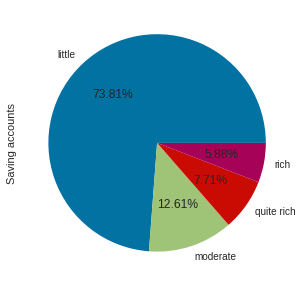

In [ ]:
#plot diagnosa stroke menggunakan pie chart untuk melihat perbandingan dalam persen.
df['Saving accounts'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

Terdapat 73.81% customers memiliki tipe "little" Saving accounts/rekening tabungan, 12.61% customers memiliki "moderate" Saving accounts/rekening tabungan, 7.71% customers memiliki jenis "quite rich" Saving accounts dan 5.88% customers memiliki jenis tabungan "rich"

Text(0.5, 1.0, 'Type of Checking Account')

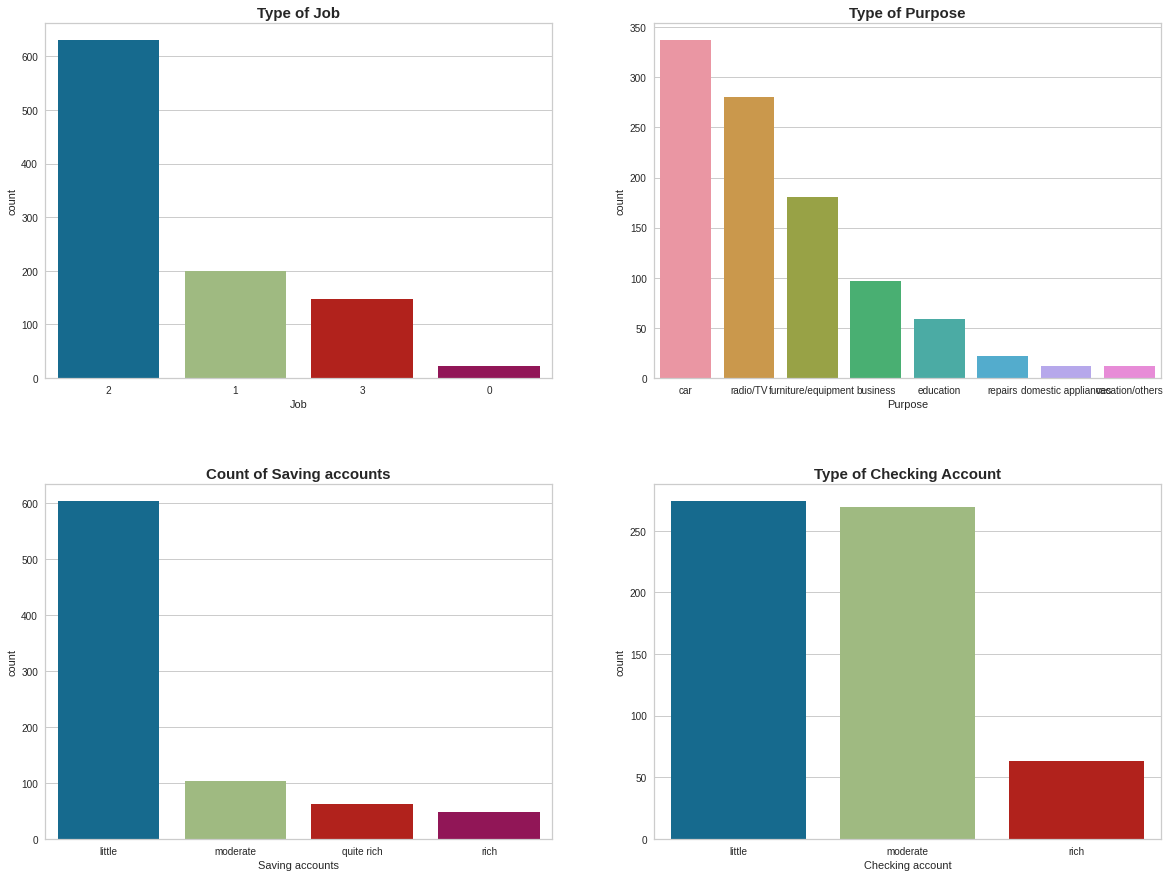

In [ ]:
fig,axs = plt.subplots(2,2, figsize = (20,15))
plt.subplot(2, 2, 1)
plt.subplots_adjust(hspace = 0.3)
sns.countplot(x = 'Job',
              data = df,
              order = df['Job'].value_counts().index)
plt.title('Type of Job', weight='bold', fontsize=15)

plt.subplot(2, 2, 2)
sns.countplot(x = 'Purpose',
              data = df,
              order = df['Purpose'].value_counts().index)
plt.title('Type of Purpose', weight='bold', fontsize=15)


plt.subplot(2, 2, 3)
sns.countplot(x = 'Saving accounts',
              data = df,
              order = df['Saving accounts'].value_counts().index)
plt.title('Count of Saving accounts', weight='bold', fontsize=15)

plt.subplot(2, 2, 4)
sns.countplot(x = 'Checking account',
              data = df,
              order = df['Checking account'].value_counts().index)
plt.title('Type of Checking Account', weight='bold', fontsize=15)

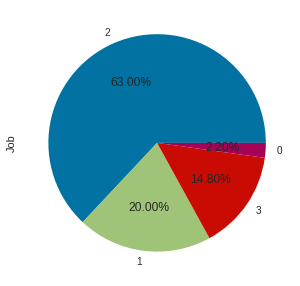

In [ ]:
#plot diagnosa stroke menggunakan pie chart untuk melihat perbandingan dalam persen.
df['Job'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

- Dalam tipe Job, 0 = unskilled dan non-resident, 1 = unskilled dan resident, 2 = skilled dan 3 = highly skilled.
- Sebesar 63% customers memiliki tipe pekerjaan "skilled", 20% unskilled dan resident, 14.8% highly skilled dan 2.20% customers unskilled dan non-resident.

In [ ]:
#Menampilkan jenis klasifikasi diagnosa Purpose 
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [ ]:
#Menampilkan jenis klasifikasi diagnosa Purpose 
df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

- Dari grafik bar chart di atas terlihat bahwa sebagian besar tujuan peminjaman kredit adalah untuk pembelian mobil sebanyak 337 nasabah, pembelian radio/TV sebanyak 280 nasabah, dan pembelian furniture/equipment sebanyak 181 nasabah.

In [ ]:
#Menampilkan jenis klasifikasi diagnosa Checking account 
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [ ]:
#Menampilkan jenis klasifikasi diagnosa Checking account 
df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

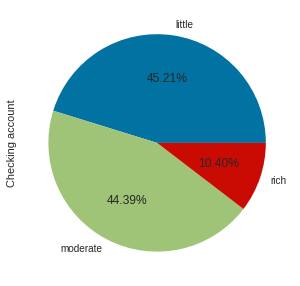

In [ ]:
#plot Checking account menggunakan pie chart untuk melihat perbandingan dalam persen.
df['Checking account'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

- Dari plot grafik bar chart dan pie chart di atas terlihat bahwa sebesar 45.21% nasabah dengan checking account little, 44.39% nasabah dengan checking account moderate, dan sebesar 10.40% nasabah dengan checking account rich.

## Data Preparation

###Handling Outlier

In [ ]:
# Fungsi untuk membuat histogram dan boxplot.
# Fungsi ini mengambil dataframe (df) dan variable yang akan dilihat distribusinya

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

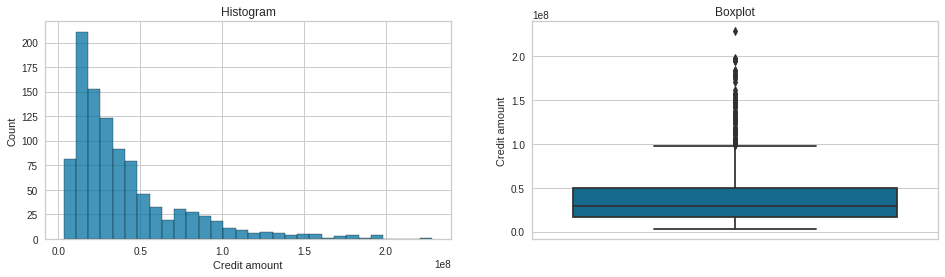


Skewness Value :  1.9496276798326202


In [ ]:
# variabel yang digunakan adalah 'Credit amount' dari data 

diagnostic_plots(df, 'Credit amount')
print('\nSkewness Value : ', df['Credit amount'].skew())

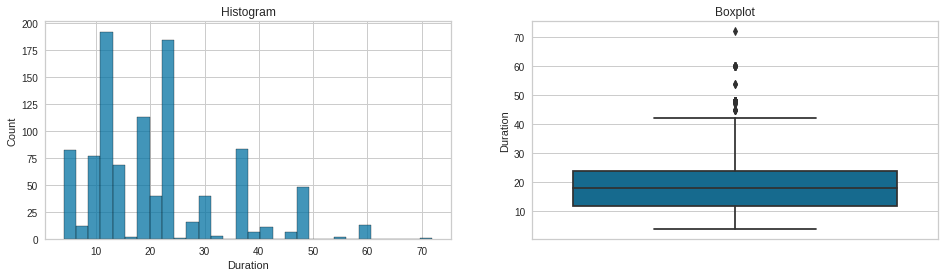


Skewness Value :  1.0941841715555418


In [ ]:
# variabel yang digunakan adalah 'Duration' dari data 

diagnostic_plots(df, 'Duration')
print('\nSkewness Value : ', df['Duration'].skew())

In [ ]:
# Create the capper

windsorizer = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Credit amount','Duration'])

windsorizer.fit(df)

#transform caping ke data
data_t = windsorizer.transform(df)

In [ ]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsorizer.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsorizer.right_tail_caps_)

Left Tail Caps  :  {'Credit amount': -31550805.375, 'Duration': -6.0}
Right Tail Caps :  {'Credit amount': 97733567.625, 'Duration': 42.0}


In [ ]:
# Distribusi data sebelum dan sesudah capping
print('Age Dataframe - Before Capping')
print(df.describe())
print('')
print('Age Dataframe - After Capping')
print(data_t.describe())

Age Dataframe - Before Capping
                No          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000   1.000000e+03  1000.000000
mean    499.500000    35.546000     1.904000   4.056033e+07    20.903000
std     288.819436    11.375469     0.653614   3.499911e+07    12.058814
min       0.000000    19.000000     0.000000   3.099750e+06     4.000000
25%     249.750000    27.000000     2.000000   1.693083e+07    12.000000
50%     499.500000    33.000000     2.000000   2.875948e+07    18.000000
75%     749.250000    42.000000     2.000000   4.925193e+07    24.000000
max     999.000000    75.000000     3.000000   2.284392e+08    72.000000

Age Dataframe - After Capping
                No          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000   1.000000e+03  1000.000000
mean    499.500000    35.546000     1.904000   3.783060e+07    20.307000
std     288.819436    11.375469     0.653614   2.711835e+07   

Credit amount - Before Capping


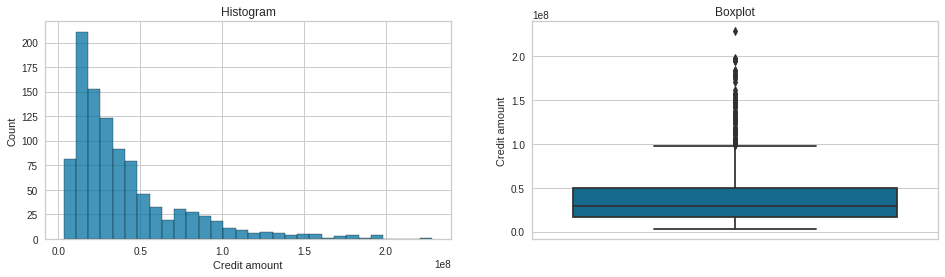


age - After Capping


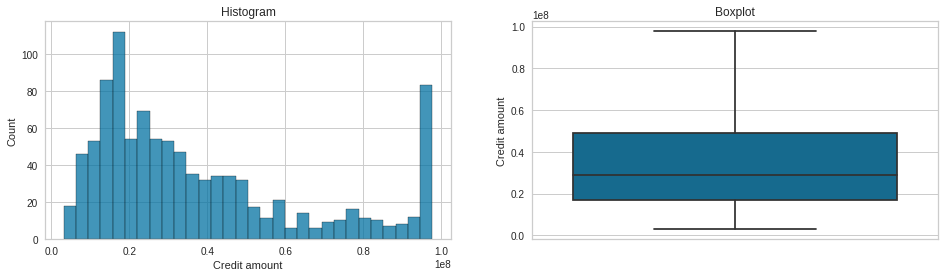

Duration - Before Capping


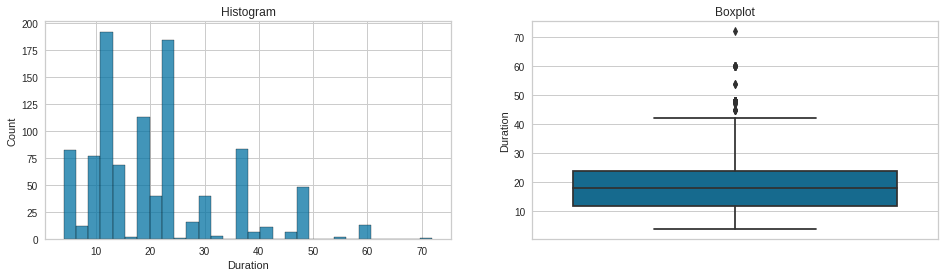


age - After Capping


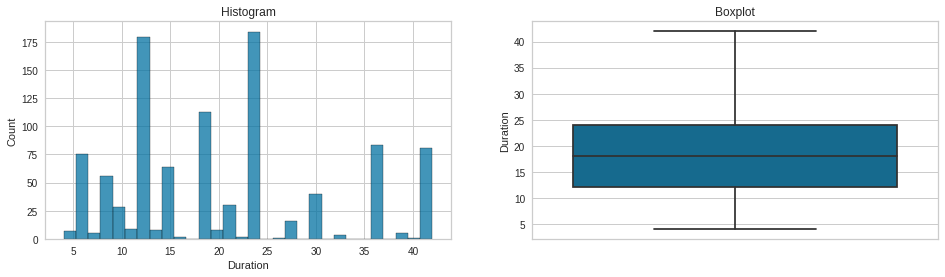

In [ ]:
# Let's find outliers in `Duration`, Duration

print('Credit amount - Before Capping')
diagnostic_plots(df, 'Credit amount')
print('\nage - After Capping')
diagnostic_plots(data_t, 'Credit amount')

print('Duration - Before Capping')
diagnostic_plots(df, 'Duration')
print('\nage - After Capping')
diagnostic_plots(data_t, 'Duration')


### Handling Missing Values

In [ ]:
#Mengecek Missing Values
data_t.isnull().sum()

No                    0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [ ]:
data_t['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [ ]:
data_t['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [ ]:
data_t['Saving accounts'] = data_t['Saving accounts'].fillna('none')

In [ ]:
data_t['Saving accounts'].unique()

array(['none', 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [ ]:
data_t['Saving accounts'].value_counts()

little        603
none          183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [ ]:
data_t['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [ ]:
data_t['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [ ]:
data_t['Checking account'] = data_t['Checking account'].fillna('none')

In [ ]:
data_t['Checking account'].unique()

array(['little', 'moderate', 'none', 'rich'], dtype=object)

In [ ]:
data_t['Checking account'].value_counts()

none        394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [ ]:
#Mengecek Missing Values
data_t.isnull().sum()

No                  0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [ ]:
# menghapus kolom CUST_ID
data_t.drop(['No'], axis=1, inplace=True)

In [ ]:
data_t

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,none,little,14494431.0,6.0,radio/TV
1,22,female,2,own,little,moderate,73786449.0,42.0,radio/TV
2,49,male,1,own,little,none,25988304.0,12.0,education
3,45,male,2,free,little,little,97728918.0,42.0,furniture/equipment
4,53,male,2,free,little,little,60383130.0,24.0,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,none,21524664.0,12.0,furniture/equipment
996,40,male,3,own,little,little,47822943.0,30.0,car
997,38,male,2,own,little,none,9968796.0,12.0,radio/TV
998,23,male,2,free,little,little,22876155.0,42.0,radio/TV


### Get Data for Model Inference

In [ ]:
# Mengambil Data untuk Model Inference, sebanyak 10 data.
data_inf = data_t.sample(10, random_state=1) #1 adalah angka dipilih random, supaya data tidak berubah2
data_inf

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
507,34,male,3,own,moderate,moderate,8.493315e+07,15.0,car
818,43,male,3,own,little,little,9.773357e+07,36.0,vacation/others
452,34,male,2,own,little,none,3.420884e+07,12.0,furniture/equipment
368,42,male,2,own,little,little,4.272695e+07,36.0,furniture/equipment
242,24,male,2,free,little,little,5.709740e+07,42.0,car
929,43,male,1,own,little,little,1.666426e+07,12.0,car
262,36,male,3,free,little,little,6.573950e+07,18.0,car
810,26,male,2,own,little,moderate,1.124589e+07,8.0,business
318,32,male,2,own,little,none,8.691699e+06,12.0,education
49,28,female,2,own,moderate,none,2.570313e+07,12.0,radio/TV


In [ ]:
# Memisahkan Inference-Set dari Dataset
data = data_t.drop(data_inf.index)
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,none,little,14494431.0,6.0,radio/TV
1,22,female,2,own,little,moderate,73786449.0,42.0,radio/TV
2,49,male,1,own,little,none,25988304.0,12.0,education
3,45,male,2,free,little,little,97728918.0,42.0,furniture/equipment
4,53,male,2,free,little,little,60383130.0,24.0,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,none,21524664.0,12.0,furniture/equipment
996,40,male,3,own,little,little,47822943.0,30.0,car
997,38,male,2,own,little,none,9968796.0,12.0,radio/TV
998,23,male,2,free,little,little,22876155.0,42.0,radio/TV


In [ ]:
#Reset Index

data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,34,male,3,own,moderate,moderate,8.493315e+07,15.0,car
1,43,male,3,own,little,little,9.773357e+07,36.0,vacation/others
2,34,male,2,own,little,none,3.420884e+07,12.0,furniture/equipment
3,42,male,2,own,little,little,4.272695e+07,36.0,furniture/equipment
4,24,male,2,free,little,little,5.709740e+07,42.0,car
5,43,male,1,own,little,little,1.666426e+07,12.0,car
6,36,male,3,free,little,little,6.573950e+07,18.0,car
7,26,male,2,own,little,moderate,1.124589e+07,8.0,business
8,32,male,2,own,little,none,8.691699e+06,12.0,education
9,28,female,2,own,moderate,none,2.570313e+07,12.0,radio/TV


In [ ]:
# Get Numerical Columns and Categorical Columns

num_columns = data.select_dtypes(include=np.number).columns.tolist()
cat_columns = data.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['Age', 'Job', 'Credit amount', 'Duration']
Categorical Columns :  ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']


In [ ]:
# Show numerical column

data_num = data[num_columns]
data_num

,Age,Job,Credit amount,Duration
0,67,2,14494431.0,6.0
1,22,2,73786449.0,42.0
2,49,1,25988304.0,12.0
3,45,2,97728918.0,42.0
4,53,2,60383130.0,24.0
...,...,...,...,...
985,31,1,21524664.0,12.0
986,40,3,47822943.0,30.0
987,38,2,9968796.0,12.0
988,23,2,22876155.0,42.0


### **Data Scaling**

In [ ]:
#Feature Scaling using Standard Scaler
scaler = MinMaxScaler()

In [ ]:
data_scaled = scaler.fit_transform(data_num)

In [ ]:
#merubah ke data frame
data_scaled = pd.DataFrame(data_scaled, columns=['Age', 'Job', 'Credit amount', 'Duration']) #merubah ke dataframe
data_scaled

,Age,Job,Credit amount,Duration
0,0.857143,0.666667,0.120408,0.052632
1,0.053571,0.666667,0.746950,1.000000
2,0.535714,0.333333,0.241864,0.210526
3,0.464286,0.666667,0.999951,1.000000
4,0.607143,0.666667,0.605316,0.526316
...,...,...,...,...
985,0.214286,0.333333,0.194697,0.210526
986,0.375000,1.000000,0.472592,0.684211
987,0.339286,0.666667,0.072586,0.210526
988,0.071429,0.666667,0.208978,1.000000


## Model Definition

In [ ]:
# cek multicollinearity

vif = pd.DataFrame()
vif["feature"] = data_scaled.columns

# calculating VIF from each feature
vif["VIF"] =[variance_inflation_factor(data_scaled.values, i) for i in range(len(data_scaled.columns))]

vif

,feature,VIF
0,Age,2.592327
1,Job,4.764061
2,Credit amount,4.679031
3,Duration,5.389966


In [ ]:
pca_scaled = PCA(n_components=4).fit(data_scaled)
pca_scaled.explained_variance_ratio_

array([0.54949175, 0.17579146, 0.16445067, 0.11026612])

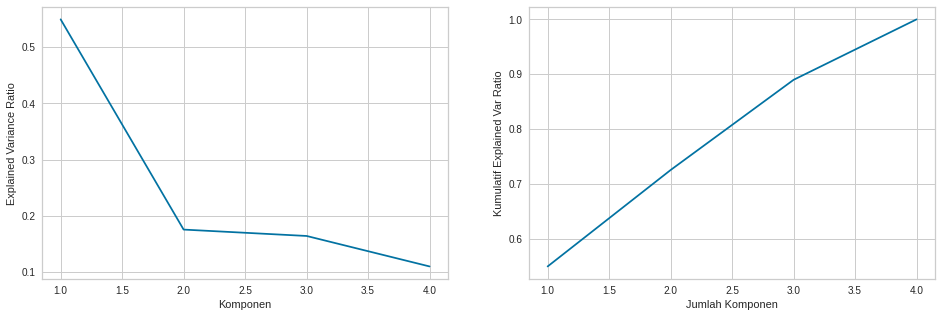

In [ ]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,5),pca_scaled.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,5),np.cumsum(pca_scaled.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

In [ ]:
#pca menggunakan 3 komponen
pca = PCA(n_components=3)
pca.fit(data_scaled)
data_reduced = pca.transform(data_scaled)

In [ ]:
data_reduced

array([[-0.41984011,  0.47932559,  0.33406051],
       [ 0.65877544, -0.28323575, -0.10003574],
       [-0.30689202, -0.00261868,  0.3355867 ],
       ...,
       [-0.34528169,  0.10248678, -0.0482643 ],
       [ 0.27979015, -0.2992981 , -0.16110128],
       [ 0.53142508, -0.23610183, -0.05780076]])

In [ ]:
#merubah ke dataframe
data_reduced1 = pd.DataFrame(data_reduced)
data_reduced1

,0,1,2
0,-0.419840,0.479326,0.334061
1,0.658775,-0.283236,-0.100036
2,-0.306892,-0.002619,0.335587
3,0.834807,-0.011489,0.244048
4,0.239554,0.202441,0.254995
...,...,...,...
985,-0.338424,-0.207630,0.087192
986,0.332619,0.238917,-0.136702
987,-0.345282,0.102487,-0.048264
988,0.279790,-0.299298,-0.161101


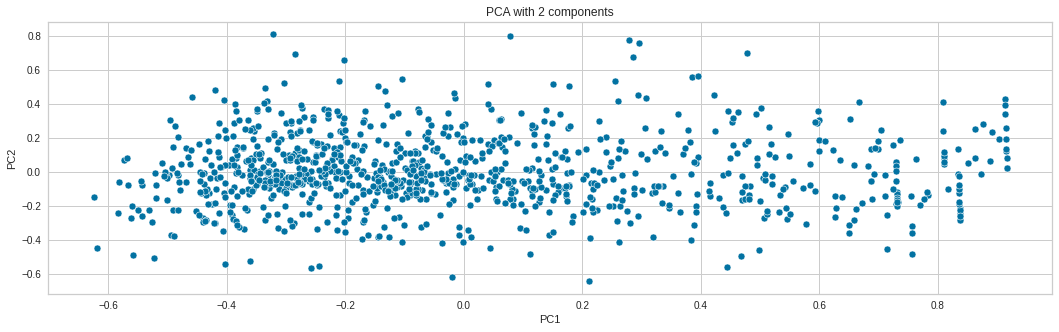

In [ ]:
pca_2d = PCA(n_components=3, random_state=26)
X_2d  = pca_2d.fit_transform(data_reduced)

plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with 2 components')
plt.show()

### **K-means Model**

In [ ]:
#finding optimal number of clusters
kmeans_per_k = [KMeans(n_clusters=k, random_state=26).fit(data_scaled)
                for k in range(1, 9)]

Elbow Method


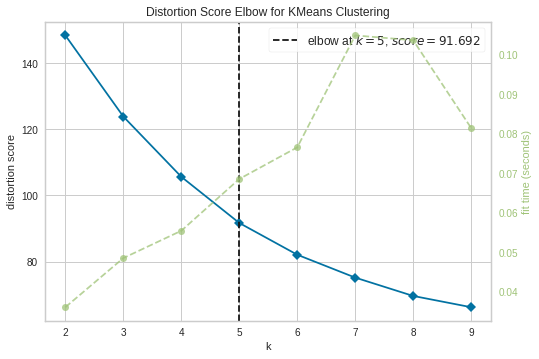

In [ ]:
# Melihat grafik Elbow Method
print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=9)
Elbow_M.fit(data_scaled)
Elbow_M.show()

In [ ]:
k=[2,3,4,5,6,7,8,9]
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data_reduced)
                for k in range(1, 9)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [ ]:
silhouette_scores = [silhouette_score(data_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

In [ ]:
silhouette_scores

[0.3911057807610066,
 0.29111224412017817,
 0.25985575307137554,
 0.2679890475272132,
 0.27474172364020893,
 0.25504721174869166,
 0.2629857636907687]

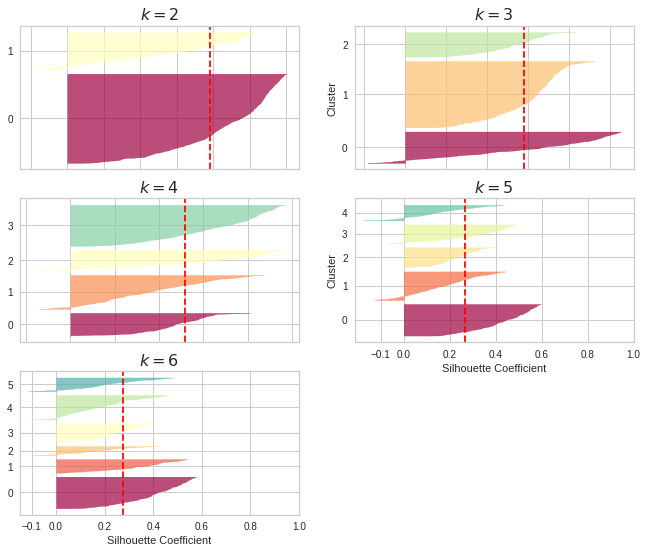

In [ ]:
plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(data_scaled, y_pred)

    padding = len(data_scaled) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [ ]:
#kmeans dengan k=4
kmeans = KMeans(n_clusters=2, random_state=26)
kmeans.fit(data_scaled)

KMeans(n_clusters=2, random_state=26)

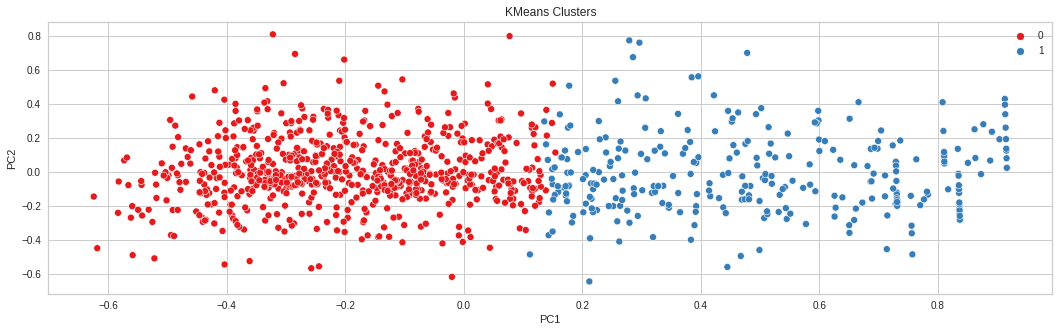

In [ ]:
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=kmeans.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

In [ ]:
#kmeans dengan k=3
kmeans = KMeans(n_clusters=3, random_state=26)
kmeans.fit(data_reduced)

KMeans(n_clusters=3, random_state=26)

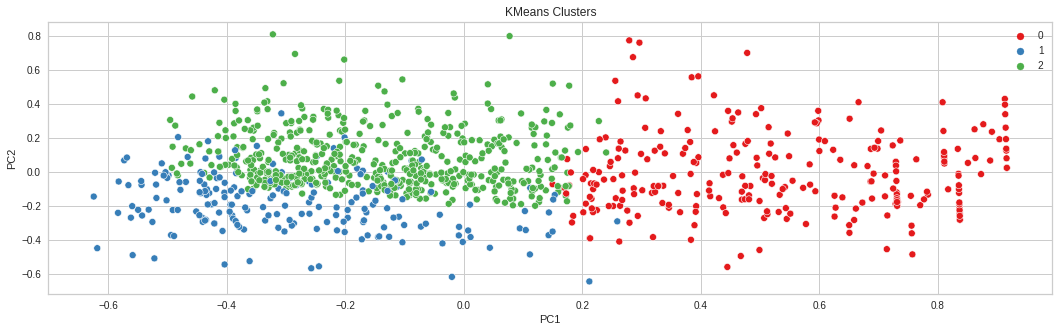

In [ ]:
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=kmeans.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

In [ ]:
data_clusterdf = data
data_clusterdf['cluster'] = kmeans.labels_
data_clusterdf.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster,cluster
0,67,male,2,own,none,little,14494431.0,6.0,radio/TV,3,0
1,22,female,2,own,little,moderate,73786449.0,42.0,radio/TV,1,1
2,49,male,1,own,little,none,25988304.0,12.0,education,0,0
3,45,male,2,free,little,little,97728918.0,42.0,furniture/equipment,1,1
4,53,male,2,free,little,little,60383130.0,24.0,car,3,1


In [ ]:
data_clusterdf.drop(['Cluster'],axis=1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,cluster
0,67,male,2,own,none,little,14494431.0,6.0,radio/TV,0
1,22,female,2,own,little,moderate,73786449.0,42.0,radio/TV,1
2,49,male,1,own,little,none,25988304.0,12.0,education,0
3,45,male,2,free,little,little,97728918.0,42.0,furniture/equipment,1
4,53,male,2,free,little,little,60383130.0,24.0,car,1
...,...,...,...,...,...,...,...,...,...,...
985,31,female,1,own,little,none,21524664.0,12.0,furniture/equipment,0
986,40,male,3,own,little,little,47822943.0,30.0,car,1
987,38,male,2,own,little,none,9968796.0,12.0,radio/TV,0
988,23,male,2,free,little,little,22876155.0,42.0,radio/TV,1


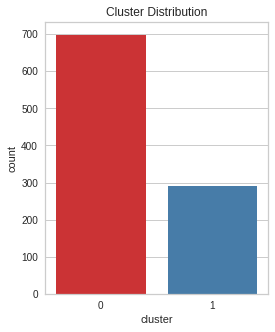

In [ ]:
#plot histogram cluster
plt.figure(figsize=(4, 5))
sns.countplot(data=data_clusterdf, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

In [ ]:
#melihat jumlah anggota masing-masing cluster
data_clusterdf['cluster'].value_counts()

0    698
1    292
Name: cluster, dtype: int64

### **Agglomerative**

In [ ]:
# Definisi Model Agglomerative
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(data_reduced)

AgglomerativeClustering()

In [ ]:
data_cluster3 = data
data_cluster3['cluster'] = agglo.labels_
data_cluster3.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster,cluster
0,67,male,2,own,none,little,14494431.0,6.0,radio/TV,3,0
1,22,female,2,own,little,moderate,73786449.0,42.0,radio/TV,1,1
2,49,male,1,own,little,none,25988304.0,12.0,education,0,0
3,45,male,2,free,little,little,97728918.0,42.0,furniture/equipment,1,1
4,53,male,2,free,little,little,60383130.0,24.0,car,3,0


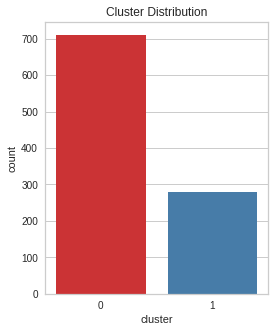

In [ ]:
plt.figure(figsize=(4, 5))
sns.countplot(data=data_cluster3, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

## Exploratory Data Analysis after Modelling

Text(0.5, 1.0, 'Job')

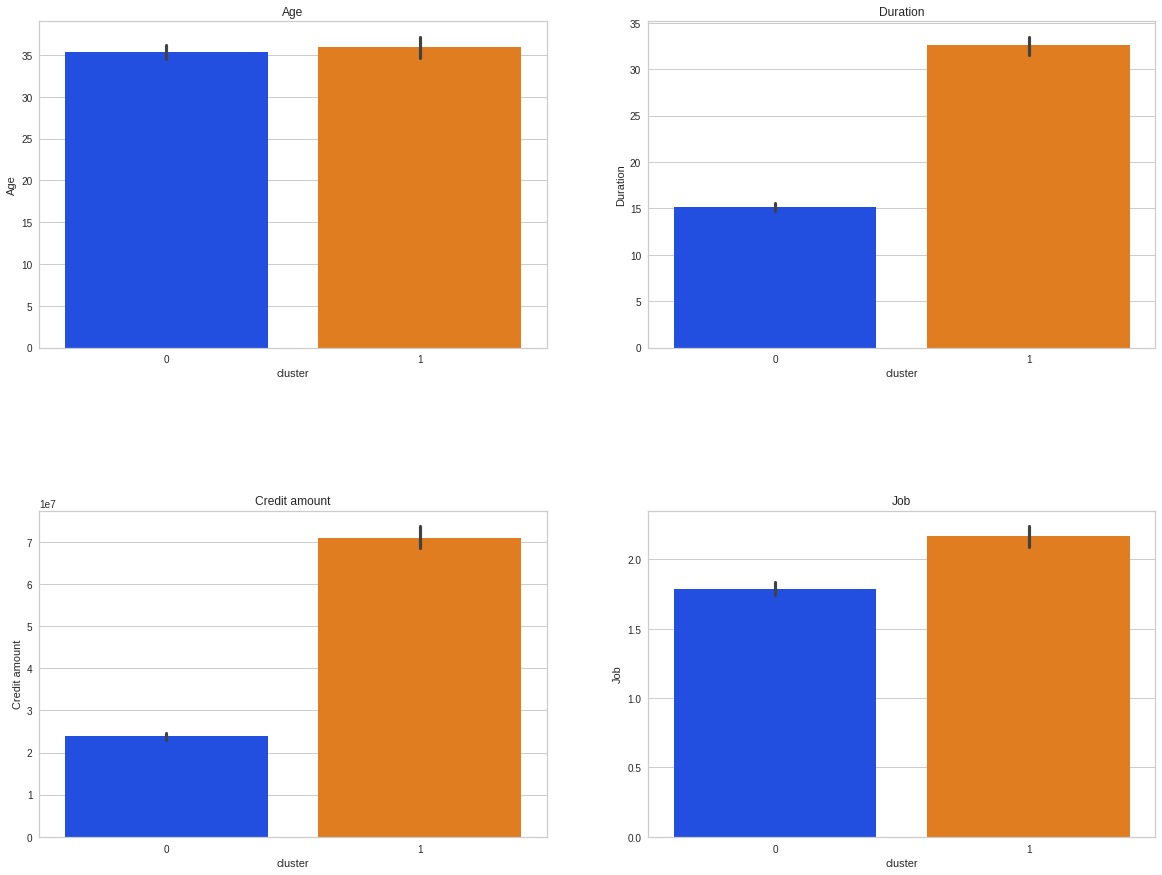

In [ ]:
# Show barplot of clusters

fig,axs = plt.subplots(2,2, figsize = (20,15))
plt.subplot(2, 2, 1)
plt.subplots_adjust(hspace = 0.5)
sns.barplot(x= 'cluster', y = 'Age', data = data_clusterdf, palette='bright')
plt.title('Age')

plt.subplot(2, 2, 2)
sns.barplot(x= 'cluster', y = 'Duration', data = data_clusterdf, palette='bright')
plt.title('Duration')


plt.subplot(2, 2, 3)
sns.barplot(x= 'cluster', y = 'Credit amount', data = data_clusterdf, palette='bright')
plt.title('Credit amount')


plt.subplot(2, 2, 4)
sns.barplot(x= 'cluster', y = 'Job', data = data_clusterdf, palette='bright')
plt.title('Job')


- Dari hasil EDA setelah dilakukan clustering di atas, terlihat bahwa pada cluster 0 lebih banyak berisi nasabah dengan nilai Credit Amount yang lebih rendah dan Duration yang rendah. Cluster 1 berisi nasabah dengan nilai credit amount yang lebih tinggi dan Duration yang lebih lama.

In [ ]:
data_clusterdf['cluster'].unique()

array([0, 1])

In [ ]:
#melihat jumlah anggota masing-masing cluster
data_clusterdf['cluster'].value_counts()

0    710
1    280
Name: cluster, dtype: int64

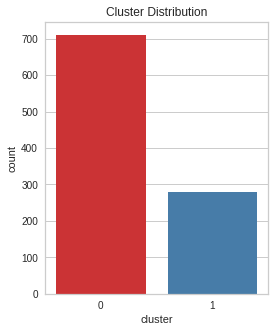

In [ ]:
#plot histogram cluster
plt.figure(figsize=(4, 5))
sns.countplot(data=data_clusterdf, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

In [ ]:
# Melihat Anggota Cluster 0
cluster0 = data[data['cluster'] == 0 ]
cluster0

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster,cluster
0,67,male,2,own,none,little,14494431.0,6.0,radio/TV,3,0
2,49,male,1,own,little,none,25988304.0,12.0,education,0,0
4,53,male,2,free,little,little,60383130.0,24.0,car,3,0
6,53,male,2,own,quite rich,none,35151165.0,24.0,furniture/equipment,3,0
8,61,male,1,own,rich,none,37928541.0,12.0,radio/TV,3,0
...,...,...,...,...,...,...,...,...,...,...,...
982,23,male,1,rent,none,little,24004464.0,18.0,radio/TV,0,0
984,50,male,2,own,none,none,29633610.0,12.0,car,3,0
985,31,female,1,own,little,none,21524664.0,12.0,furniture/equipment,0,0
986,40,male,3,own,little,little,47822943.0,30.0,car,1,0


In [ ]:
#mengecek distribusi cluster 0
cluster0.describe()

,Age,Job,Credit amount,Duration,cluster
count,710.000000,710.000000,7.100000e+02,710.000000,710.0
mean,36.363380,1.833803,2.497720e+07,15.388732,0.0
std,12.177707,0.644373,1.481926e+07,6.639913,0.0
min,19.000000,0.000000,3.099750e+06,4.000000,0.0
25%,27.000000,1.000000,1.526317e+07,12.000000,0.0
50%,34.000000,2.000000,2.130148e+07,14.000000,0.0
75%,44.000000,2.000000,3.217540e+07,21.000000,0.0
max,75.000000,3.000000,9.773357e+07,42.000000,0.0


In [ ]:
# Melihat Anggota Cluster 1
cluster1 = data[data['cluster'] == 1 ]
cluster1

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster,cluster
1,22,female,2,own,little,moderate,7.378645e+07,42.0,radio/TV,1,1
3,45,male,2,free,little,little,9.772892e+07,42.0,furniture/equipment,1,1
5,35,male,1,free,none,none,9.773357e+07,36.0,education,1,1
7,35,male,3,rent,little,moderate,8.614825e+07,36.0,car,1,1
9,28,male,3,own,little,moderate,6.489637e+07,30.0,car,1,1
...,...,...,...,...,...,...,...,...,...,...,...
976,33,male,2,own,little,rich,7.797731e+07,42.0,business,1,1
978,29,male,3,free,little,little,8.157302e+07,24.0,car,1,1
983,30,male,3,own,little,little,4.908764e+07,36.0,furniture/equipment,1,1
988,23,male,2,free,little,little,2.287616e+07,42.0,radio/TV,1,1


In [ ]:
##mengecek distribusi cluster 1
cluster1.describe()

,Age,Job,Credit amount,Duration,cluster
count,280.000000,280.000000,2.800000e+02,280.000000,280.0
mean,33.521429,2.071429,7.018588e+07,32.778571,1.0
std,8.891192,0.646389,2.390241e+07,8.287026,0.0
min,21.000000,0.000000,1.127069e+07,6.000000,1.0
25%,27.000000,2.000000,4.923023e+07,24.000000,1.0
50%,31.000000,2.000000,7.380505e+07,36.000000,1.0
75%,38.000000,2.000000,9.773008e+07,42.000000,1.0
max,65.000000,3.000000,9.773357e+07,42.000000,1.0


- **Model Saving**

In [ ]:
# save the model
with open('kmeans.pkl', 'wb') as file_1 :
  joblib.dump(kmeans, file_1)

with open('scaler.pkl', 'wb') as file_2 :
  joblib.dump(scaler, file_2)

with open('pca.pkl', 'wb') as file_3:
  joblib.dump(pca, file_3)

In [ ]:
# load the model
with open('kmeans.pkl', 'rb') as file_1:
  kmeans = joblib.load(file_1)

with open('scaler.pkl', 'rb') as file_2:
  scaler = joblib.load(file_2)

with open('pca.pkl', 'rb') as file_3:
  pca = joblib.load(file_3)

## **Model Inference**

In [ ]:
data_inf

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,34,male,3,own,moderate,moderate,8.493315e+07,15.0,car
1,43,male,3,own,little,little,9.773357e+07,36.0,vacation/others
2,34,male,2,own,little,none,3.420884e+07,12.0,furniture/equipment
3,42,male,2,own,little,little,4.272695e+07,36.0,furniture/equipment
4,24,male,2,free,little,little,5.709740e+07,42.0,car
5,43,male,1,own,little,little,1.666426e+07,12.0,car
6,36,male,3,free,little,little,6.573950e+07,18.0,car
7,26,male,2,own,little,moderate,1.124589e+07,8.0,business
8,32,male,2,own,little,none,8.691699e+06,12.0,education
9,28,female,2,own,moderate,none,2.570313e+07,12.0,radio/TV


In [ ]:
#Scaling
df_inf_scaled = scaler.fit_transform(data_inf[num_columns])
df_inf_scaled1= pd.DataFrame(df_inf_scaled, columns = num_columns)

In [ ]:
# Reduce with PCA

pca.fit(df_inf_scaled)
df_inf_reduced = pca.transform(df_inf_scaled)

In [ ]:
# Clustering using K-Means

kmeans.fit(df_inf_reduced)
labels2=kmeans.labels_

In [ ]:
# Concat cluster with dataset
df_inf_final = data_inf.copy()
df_inf_final['cluster_id'] = labels2
df_inf_final.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,cluster_id
0,34,male,3,own,moderate,moderate,8.493315e+07,15.0,car,1
1,43,male,3,own,little,little,9.773357e+07,36.0,vacation/others,1
2,34,male,2,own,little,none,3.420884e+07,12.0,furniture/equipment,0
3,42,male,2,own,little,little,4.272695e+07,36.0,furniture/equipment,1
4,24,male,2,free,little,little,5.709740e+07,42.0,car,1


# Conclussion / Overall Analysis

- Pada project kali ini model clustering yang digunakan adalah K-means model dan Agglomerative model. 
- Pada model K-Means menggunakan k=3, batas antar cluster tidak terlihat begitu jelas, masih terdapat tumpang tindih data.
- Pada model K-Means dengan nilai k=2 terlihat batas yang jelas pada masing-masing cluster.
- Terdapat 2 cluster menggunakan model Agglomerative model.
- Hasil cluster terbaik berdasarkan grafiknya adalah menggunakan metode **K-Means** dengan **k=2** dan menghasilkan 2 cluster dengan masing-masing anggota cluster sebagai berikut:
   - Cluster 0 yang didapatkan berisikan 710 nasabah dengan segmentasi nasabah yaitu Credit Amount rendah dan Duration credit yang lebih singkat.
   - Cluster 1 yang didapatkan berisikan 280 nasabah dengan segmentasi nasabah yaitu Credit Amount yang tinggi dan Duration credit yang lebih lama.